In [22]:
from qiskit import *

In [23]:
#building two qubit quantum circuit
# 1 - create a two qubit quantum register

qr = QuantumRegister(2)

In [24]:
# 1 - create a two qubit classical register
cr = ClassicalRegister(2)

In [25]:
#building circuit using Quantum and classical register
circuit = QuantumCircuit(qr,cr)

In [26]:
#drawing the circuit
%matplotlib inline

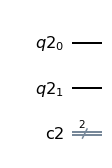

In [27]:
circuit.draw('mpl')

In [28]:
#build up gates
#H gate - hadamard gate
circuit.h(qr[0])

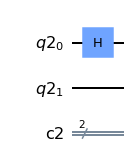

In [30]:
circuit.draw('mpl')

In [32]:
#two qubit operation - controlled X
#control - first qubit and taregt - second qubit
circuit.cx(qr[0],qr[1])

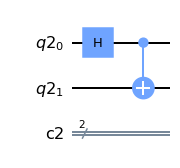

In [35]:
circuit.draw('mpl')

In [36]:
#measure quantum bits and store into classical bits
circuit.measure(qr,cr)

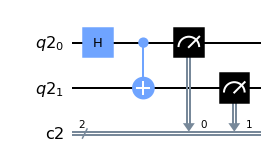

In [37]:
circuit.draw('mpl')

In [39]:
#run the circuit - using simulator - using aer component
simulator = Aer.get_backend('qasm_simulator') #qasm - quantum assembly language


In [44]:
#execute and getting results
result = execute(circuit, backend = simulator).result()

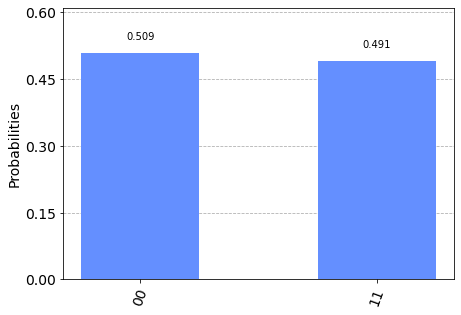

In [45]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [58]:
#run the circuit - using quantum lab at IBM
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-17 12:14:38,310: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [59]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_santiago')


In [60]:
job = execute(circuit, backend=qcomp)

In [61]:
from qiskit.tools.monitor import job_monitor

In [62]:
#monitoring job in actual quantum queue
job_monitor(job)

Job Status: job has successfully run


In [63]:
result = job.result()

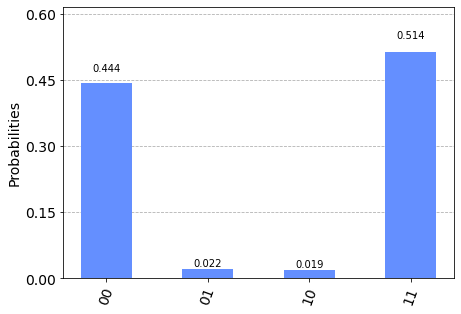

In [64]:
plot_histogram(result.get_counts(circuit))

In [65]:
from qiskit import IBMQ, Aer
provider = IBMQ.load_account()
available_cloud_backends = provider.backends() 
print('\n Cloud backends:')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\n Local backends: ')
for i in available_local_backends: print(i)

ibmqfactory.load_account:WARNING:2022-04-17 12:18:45,392: Credentials are already in use. The existing account in the session will be replaced.



 Cloud backends:
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila

 Local backends: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator
